In [16]:
import sys; sys.path.append("../.."); sys.path.append("../../src/")
import plantbox as pb
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
from structural.Plant import PlantPython
import pandas as pd
import copy

subtypes = 5
years = 50

In [82]:

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year+1 for year in range(years)]        


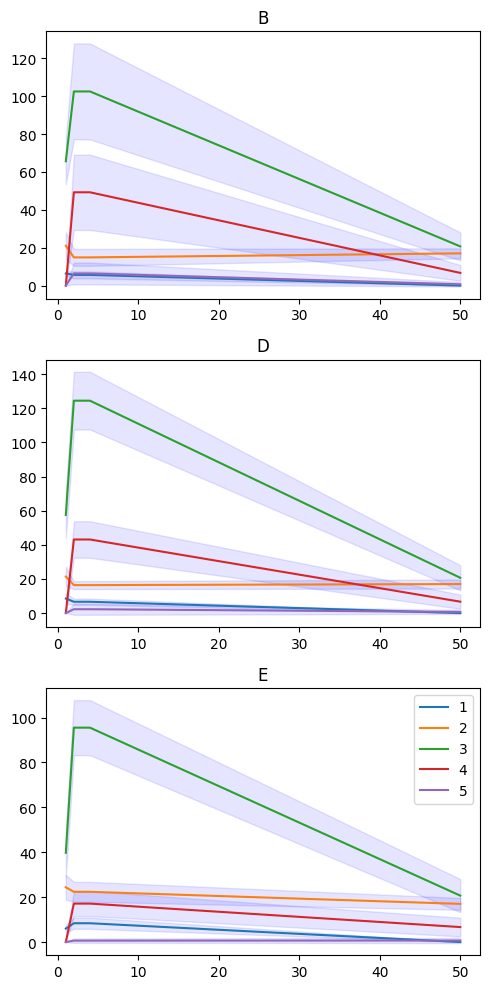

In [83]:
#####
#   num
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_num_mean = {}
outpout_num_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_num_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    outpout_num_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes):
        y = outpout_num_mean[genotype][st]
        error = outpout_num_sd[genotype][st]
        axs[gid].plot(x, y, label = st + 1)
        axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

In [84]:
#for genotype in ["B", "D", "E"]:
#    print(genotype)
#    print(outpout_num_mean[genotype])

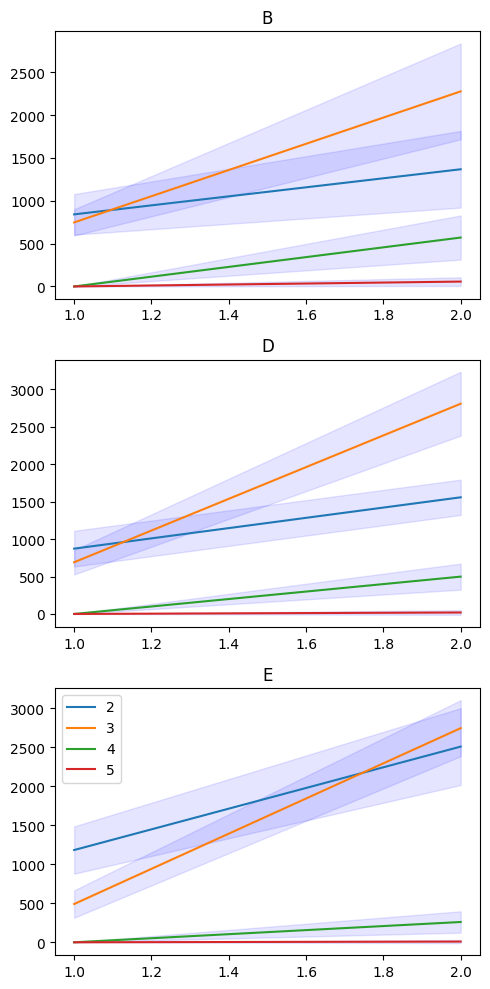

In [85]:
#####
#   length
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_len_mean = {}
outpout_len_sd = {}
x_ =[1,2]
for genotype in ["B", "D", "E"]:
    outpout_len_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    outpout_len_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    
fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]
        error = outpout_len_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        axs[gid].fill_between(x_, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

In [102]:
with open('./SurvivalRate.pkl','rb') as f:
    rtl_winters = pickle.load(f)

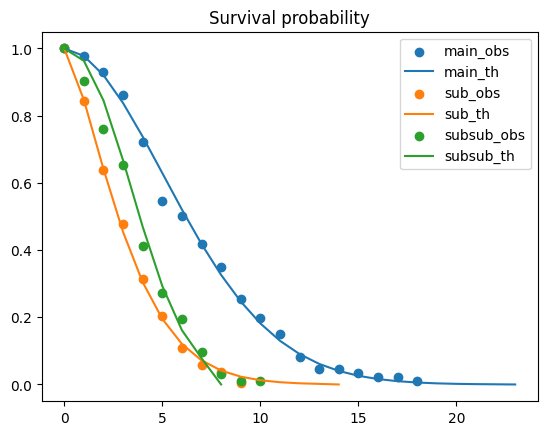

In [114]:
outout = [[],[],[]]

def survivalFunction(a, lambdao, ko,A_max ):
    if (a >= A_max): 
        return 0.0
    else:
        return np.exp(-((a**ko) / (lambdao**ko)))
        
data = {'main':[ 1.88,7.53,23],
        'sub': [1.42,3.54,14],
        'subsub': [2.17,4.55,8]}

for idrt, RootType in enumerate(['main','sub', 'subsub']):
    if len(rtl_winters[idrt] > 0):
        maxT = int(max(rtl_winters[idrt])) + 1
        for yr in range(maxT):
            ratioAlive = sum(rtl_winters[idrt] > yr)/len(rtl_winters[idrt])
            outout[idrt].append(ratioAlive)
        plt.scatter([yr for yr in range(maxT)],outout[idrt], label=RootType+'_obs')

    y_max = data[RootType][2]
    years = np.array([y for y in range(y_max+1)])
    #print(RootType,  data[RootType], years)
    rlt_ = [survivalFunction(yy, data[RootType][1],  data[RootType][0],y_max) for yy in years]
    #print('rlt_',rlt_)
    #plt.scatter(years, rlt_, label=RootType)
    plt.plot(years, rlt_, label=RootType+'_th')

plt.title("Survival probability")
plt.legend()
plt.show()

In [117]:

def survivalFunction(a, lambdao, ko,A_max ):
    return np.exp(-((a**ko) / (lambdao**ko)))
        
data = {'main':[ 1.88,7.53,23],
        'sub': [1.42,3.54,14],
        'subsub': [2.17,4.55,8]}
RootType = 'main'
y_max = data[RootType][2]
years = np.array([y for y in range(y_max+1)])
survivalFunction(y_max, data[RootType][1],  data[RootType][0],y_max)

np.float64(0.0002859503975686816)

In [ ]:
lambda_survive * (std::pow(-np.log(0.0002859503975686816),1/k_survive)) * 1225

In [115]:
a = [1,2,3]
b = [7,8,9]
a.extend(b)

In [116]:
a

[1, 2, 3, 7, 8, 9]

#####
#   length, mean, just checking that it does not decrease
# ah wait, not ok: num should be stable but maybe not length, so ignore length after year two, just look at num?
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]/outpout_num_mean[genotype][st+1]
        # error = outpout_num_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        # axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

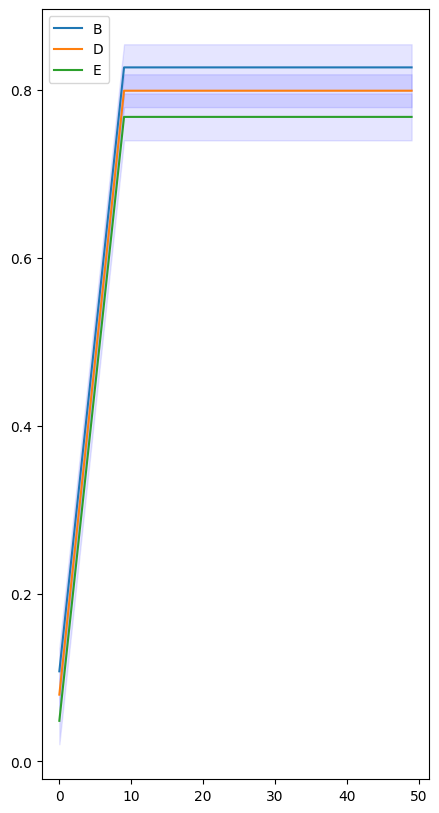

In [86]:
#####
#   ratio
#####

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year for year in range(years)]        

# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_ratio_mean = {}
outpout_ratio_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_ratio_mean[genotype] = np.array([outpout_mean[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    outpout_ratio_sd[genotype] = np.array([outpout_sd[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    
fig, axs = plt.subplots(1,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    y = outpout_ratio_mean[genotype]
    error = outpout_ratio_sd[genotype] 
    axs.plot(x, y, label = genotype)
    axs.fill_between(x, y - error, y + error, color='blue', alpha=0.1)


plt.legend()
# Adjust spacing between subplots
plt.show()

In [96]:
orders =  ['main', 'sub', 'subsub']
outpout_kde_mean = {}
outpout_kde_sd = {}
xx = {}
for genotype in ["B", "D", "E"]:
    outpout_kde_mean[genotype] = {}
    outpout_kde_sd[genotype] = {}
    for oo in orders:        
        outpout_kde_mean[genotype][oo] = outpout_mean[genotype]['year50']['kde_'+oo]
        outpout_kde_sd[genotype][oo] = outpout_sd[genotype]['year50']['kde_'+oo] 
        
    with open('./measurements'+ genotype +'InitXX.pkl','rb') as f:
            temp = pickle.load(f)
            xx[genotype] = temp

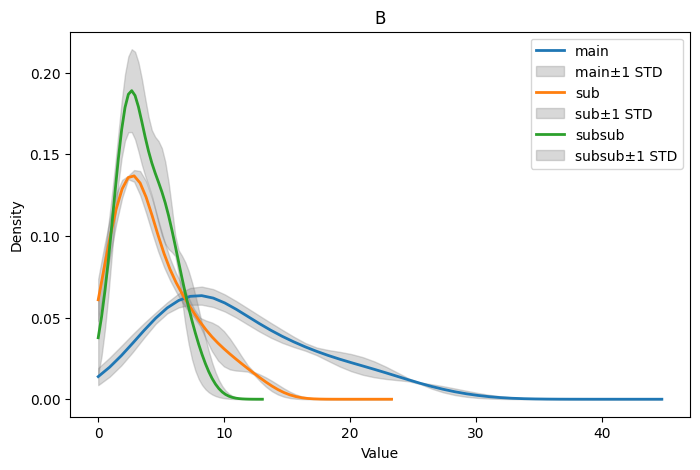

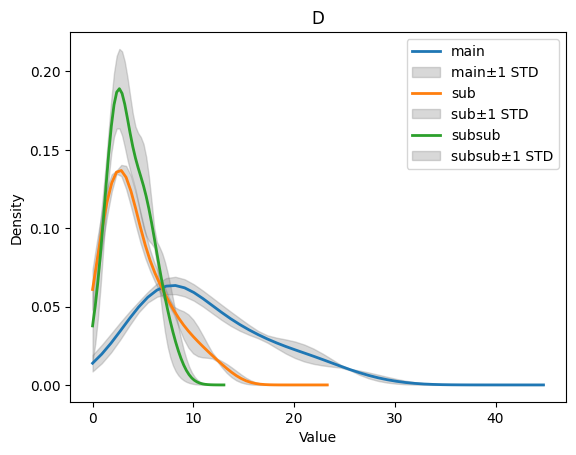

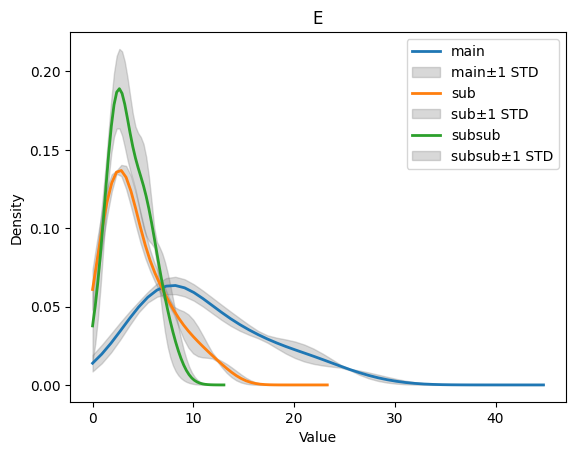

In [97]:
plt.figure(figsize=(8, 5))
for genotype in ["B", "D", "E"]:
    for oo in orders:
        mean_kde = outpout_kde_mean[genotype][oo]
        std_kde = outpout_kde_sd[genotype][oo] 
        plt.plot(xx[genotype][oo],mean_kde, label=oo, linewidth=2)
        plt.fill_between(xx[genotype][oo], mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3, label=oo + '±1 STD')
        
    # Add labels and legend
    plt.title(genotype)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

# BIN

In [98]:
24*4*3/25

11.52

In [148]:
print(np.mean([oo[0] for oo in outpout_num_mean.values()]))

0.07834288337443733


In [40]:
import pandas as pd
import  openpyxl
file_path = './rsml/length_vs_BEDD_and_root_age.xlsx'

df = pd.read_excel(file_path, sheet_name='length_vs_BEDD_and_root_age')

In [41]:
df.colnames

,FileName,root,order,length_total_est,BEDD_tot,Lmax_root,root_age
0,V-01,1_17_1,main,746.532812,15659.212048,1670.494137,13.337349
1,V-01,1_17_13_1_1,sub,145.740601,5471.384337,1396.392865,4.421687
2,V-01,1_17_19_1_1,sub,17.339161,1463.412048,1202.105335,1.168675
3,V-01,1_17_33_1_1,sub,27.616621,2812.700000,713.439017,2.253012
4,V-01,1_17_4_1_1,sub,42.383191,3313.700000,877.282664,2.614458
...,...,...,...,...,...,...,...
199,V-38,2_6_7_1_5_1_1,subsub,53.326564,6843.307229,362.556450,5.626506
200,V-38,2_6_9_1_1,sub,147.963131,3957.324096,2384.183645,3.096386
201,V-38,2_7_1,main,310.551631,10400.480723,1158.188388,8.759036
202,V-38,2_8_1,main,148.464694,6170.415663,1184.709690,5.024096


In [43]:
df.columns

Index(['FileName', 'root', 'order', 'length_total_est', 'BEDD_tot',
       'Lmax_root', 'root_age'],
      dtype='object')

In [44]:
df = df[['FileName', 'order', 'root_age']]

In [48]:
orders = list(set(df['order']))

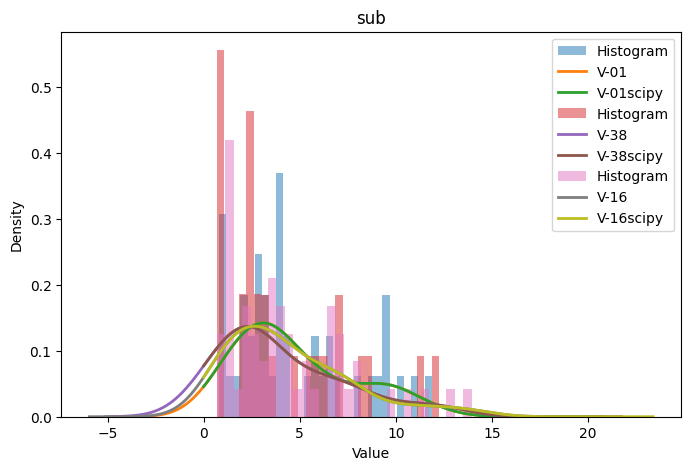

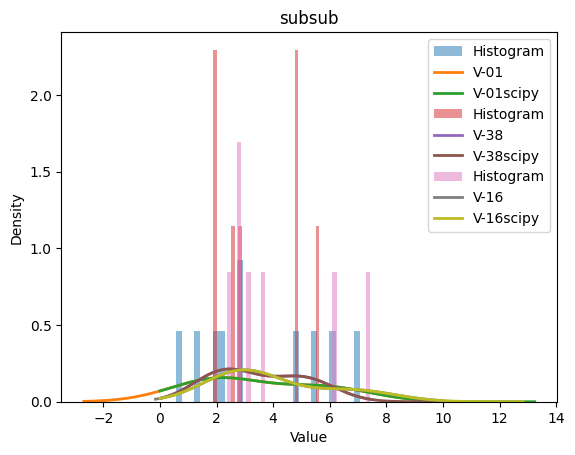

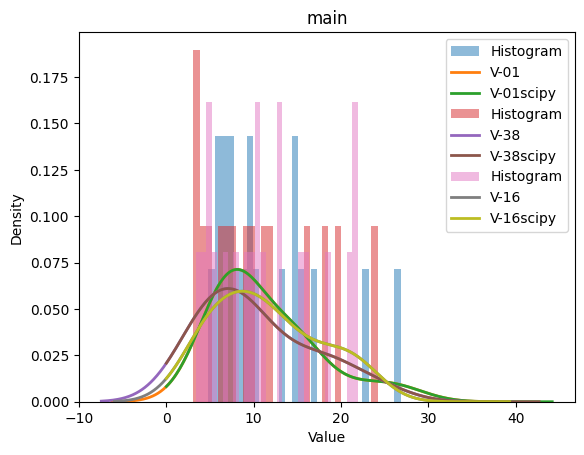

In [62]:
# Create the density plot
plt.figure(figsize=(8, 5))

for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    for im in list(set(filtered_df['FileName'])):
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        plt.hist(filtered_df_, bins=30, density=True, alpha=0.5, label='Histogram')
        
        # Add KDE line using pandas or scipy
        pd.Series(filtered_df_).plot(kind='kde', label=im, linewidth=2)

        # Add KDE line using pandas or scipy
        kde = gaussian_kde(filtered_df_)
        x = np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  3*np.std(filtered_df_), 200)
        y = kde(x)
        plt.plot(x,y, label=im+'scipy', linewidth=2)
        
    # Add labels and legend
    plt.title(oo)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

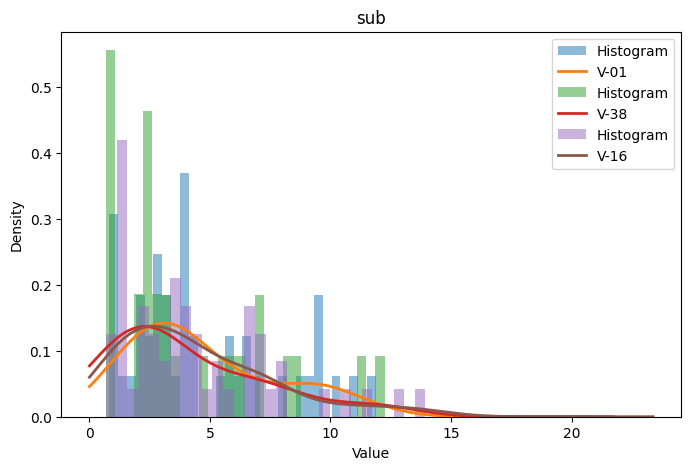

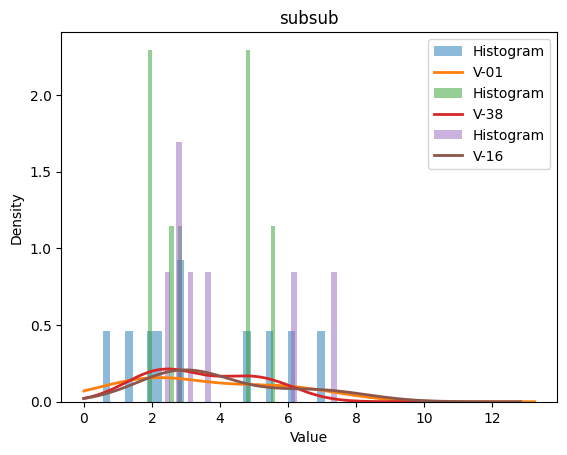

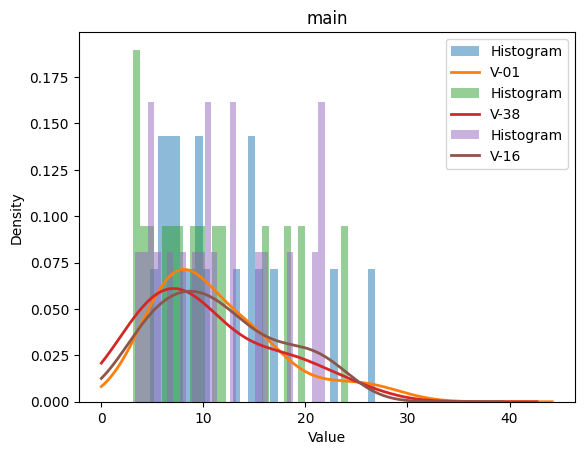

In [64]:
# Create the density plot
plt.figure(figsize=(8, 5))
ageDistrib_mean = []
ageDistrib_sd = []
for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age','FileName']].copy()
    yy = []
    for im in list(set(filtered_df['FileName'])):
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        plt.hist(filtered_df_, bins=30, density=True, alpha=0.5, label='Histogram')
        
        # Add KDE line using pandas or scipy
        kde = gaussian_kde(filtered_df_)
        x =  np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  3*np.std(filtered_df_), 200)
        y = kde(x)
        #plt.plot(x,y, label=im, linewidth=2)
        yy.append(y)
    ageDistrib_mean.append(np.mean(yy))
    ageDistrib_sd.append(np.std(yy))
    x =  np.linspace(max(filtered_df_.min() - 3*np.std(filtered_df_),0.) , filtered_df_.max() +  3*np.std(filtered_df_), 200)
    for y in yy

    # Add labels and legend
    plt.title(oo)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

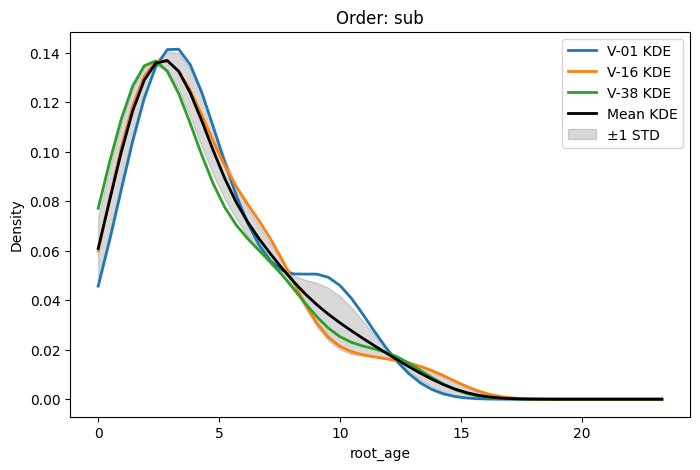

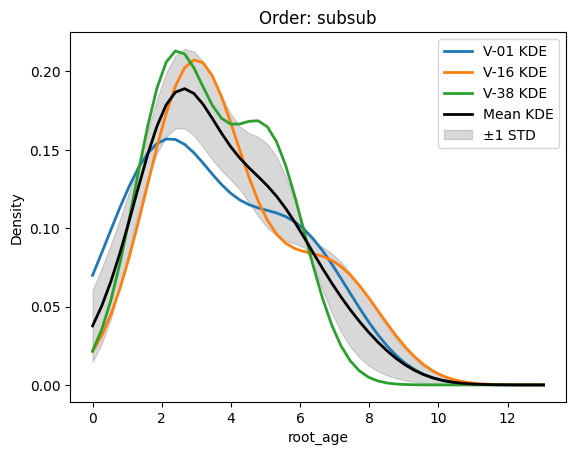

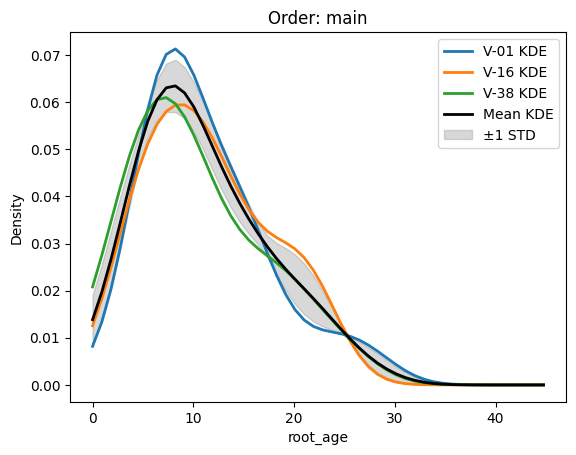

In [75]:

plt.figure(figsize=(8, 5))
mean_kdes = {}
sd_kdes = {}
xx = {}
for oo in orders:
    filtered_df = df[df['order'] == oo][['root_age', 'FileName']].copy()
    
    # List to store KDE y-values for each FileName
    kde_ys = []
    
    # Determine a common x-grid across all FileNames for this order
    min_x = max(filtered_df['root_age'].min() - 3*filtered_df['root_age'].std(), 0)
    max_x = filtered_df['root_age'].max() + 3*filtered_df['root_age'].std()
    x = np.linspace(min_x, max_x, 50)
    
    # Plot KDE for each FileName
    for im in filtered_df['FileName'].unique():
        filtered_df_ = filtered_df[filtered_df['FileName'] == im]['root_age'].copy()
        
        # Histogram (optional)
        #plt.hist(filtered_df_, bins=30, density=True, alpha=0.2, label=f'{im} Histogram')
        
        # KDE
        kde = gaussian_kde(filtered_df_)
        y = kde(x)
        plt.plot(x, y, label=f'{im} KDE', linewidth=2)
        kde_ys.append(y)
    
    # Convert list to array for easier computation
    kde_ys = np.array(kde_ys)
    
    # Compute mean and std across KDEs
    mean_kde = np.mean(kde_ys, axis=0)
    std_kde = np.std(kde_ys, axis=0)
    mean_kdes[oo] = mean_kde
    sd_kdes[oo] = std_kde
    xx[oo] = x
    # Plot mean KDE
    plt.plot(x, mean_kde, color='black', linewidth=2, label='Mean KDE')
    
    # Plot ±1 std band
    plt.fill_between(x, mean_kde - std_kde, mean_kde + std_kde, color='gray', alpha=0.3, label='±1 STD')
    
    # Labels and title
    plt.title(f'Order: {oo}')
    plt.xlabel('root_age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [76]:
xx

{'sub': array([ 0.        ,  0.47544156,  0.95088311,  1.42632467,  1.90176623,
         2.37720778,  2.85264934,  3.3280909 ,  3.80353246,  4.27897401,
         4.75441557,  5.22985713,  5.70529868,  6.18074024,  6.6561818 ,
         7.13162335,  7.60706491,  8.08250647,  8.55794802,  9.03338958,
         9.50883114,  9.9842727 , 10.45971425, 10.93515581, 11.41059737,
        11.88603892, 12.36148048, 12.83692204, 13.31236359, 13.78780515,
        14.26324671, 14.73868826, 15.21412982, 15.68957138, 16.16501294,
        16.64045449, 17.11589605, 17.59133761, 18.06677916, 18.54222072,
        19.01766228, 19.49310383, 19.96854539, 20.44398695, 20.91942851,
        21.39487006, 21.87031162, 22.34575318, 22.82119473, 23.29663629]),
 'subsub': array([ 0.        ,  0.26606015,  0.53212029,  0.79818044,  1.06424059,
         1.33030073,  1.59636088,  1.86242102,  2.12848117,  2.39454132,
         2.66060146,  2.92666161,  3.19272176,  3.4587819 ,  3.72484205,
         3.9909022 ,  4.25696234

In [74]:
mean_kdes

{'sub': array([6.08955291e-02, 8.04737488e-02, 9.97318551e-02, 1.16472873e-01,
        1.28862382e-01, 1.35755255e-01, 1.36801939e-01, 1.32429140e-01,
        1.23768793e-01, 1.12489159e-01, 1.00442974e-01, 8.91772926e-02,
        7.95268473e-02, 7.15321025e-02, 6.47252053e-02, 5.85755181e-02,
        5.28031479e-02, 4.74129511e-02, 4.25263531e-02, 3.82017073e-02,
        3.43744385e-02, 3.09106035e-02, 2.76849540e-02, 2.46150343e-02,
        2.16512565e-02, 1.87609680e-02, 1.59300047e-02, 1.31740518e-02,
        1.05421605e-02, 8.10675119e-03, 5.94631180e-03, 4.12744429e-03,
        2.68902180e-03, 1.63133334e-03, 9.14942370e-04, 4.71471155e-04,
        2.22084159e-04, 9.52432028e-05, 3.70737323e-05, 1.30684670e-05,
        4.16498159e-06, 1.19891705e-06, 3.11558284e-07, 7.30922650e-08,
        1.54890106e-08, 2.96817850e-09, 5.15300084e-10, 8.12586688e-11,
        1.16801217e-11, 1.53722893e-12]),
 'subsub': array([3.76553571e-02, 5.04253130e-02, 6.61322696e-02, 8.45990023e-02,
     

In [55]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(filtered_df_)
x = np.linspace(filtered_df_.min(), filtered_df_.max(), 200)
y = kde(x)


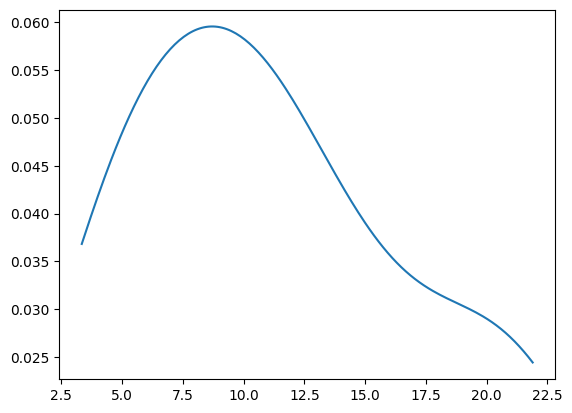

In [57]:
plt.plot(x,y)

In [ ]:

    outputs_50 = {
            'num':[0.,0.,0.,0.,0.],
            'ratio':0,
            'kde_mean':[0. for i in range(50)],
            'kde_sub':[0. for i in range(50)],
            'kde_subsub':[0. for i in range(50)]
            }
            